### **0. Preparation**


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
import csv
from collections import deque
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

### **1. Input Data**

In [16]:
uploaded = files.upload()

Saving data_test.csv to data_test (1).csv
Saving data_train.csv to data_train (1).csv


In [31]:
train_data = deque()
test_data = deque()

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
      train_data.append([float(i[0]), float(i[1]), float(i[2]), float(i[3])])
      #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
      ct += 1

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
      test_data.append([float(i[0]), float(i[1]), float(i[2]), float(i[3])])
      #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
      ct += 1

print(type(train_data[299][1]))
#print(test_data[299])

<class 'float'>


### **2. Linear Regression**
1) Linear Model
<br>
$\ f_\theta(x,y,z) = \theta_0 + \theta_1x + \theta_2y + \theta_3z  $
<br>
<br>
2) Objective Function
<br>
$\ J(\theta_0,\theta_1,\theta_2,\theta_3 ) = \frac{1}{2m} \sum_{i=1}^{m}(\theta_0 + \theta_1x^{(i)} + \theta_2y^{(i)} + \theta_3z^{(i)} - h^{(i)})^2 $
<br>
<br>
3) Gradient Descent
<br>
$\ \theta_0^{(t+1)} =  \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)},y^{(i)},z^{(i)}) - h^{(i)})$
<br>
$\ \theta_1^{(t+1)} = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)},y^{(i)},z^{(i)}) - h^{(i)})x^{(i)}$
<br>
$\ \theta_2^{(t+1)} = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)},y^{(i)},z^{(i)}) - h^{(i)})y^{(i)}$
<br>
$\ \theta_3^{(t+1)} = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)},y^{(i)},z^{(i)}) - h^{(i)})z^{(i)}$
<br>
<br>
4) HyperParameters Setting
<br>
$\ \theta_0^{(0)} = -30$  
$\ \theta_1^{(0)} = -30$  
$\ \theta_2^{(0)} = -30$  
$\ \theta_3^{(0)} = -30$
<br>
$\ lr = 3*10^{-3}$



In [0]:
def objectiveFunction(data, theta_0, theta_1, theta_2, theta_3):
  cost = 0
  predictions = deque()
  for i in range(0, 300):
    predictions.append(theta_0 + theta_1 * data[i][0] + theta_2 * data[i][1] + theta_3 * data[i][2] - data[i][3])
  cost = np.sum(np.square(predictions)) / 600
  #print("Cost",i,"번째",cost)
  return cost

In [0]:
def gradientDescent(data, theta_0, theta_1, theta_2, theta_3):
  for i in range(0, 300):
    lr = 0.0001
    estimate = theta_0 + theta_1 * data[i][0] + theta_2 * data[i][1] + theta_3 * data[i][2] 
    theta_0 -= lr * (estimate - data[i][3]) / 300
    theta_1 -= lr * data[i][0] * (estimate - data[i][3]) / 300
    theta_2 -= lr * data[i][1] * (estimate - data[i][3]) / 300
    theta_3 -= lr * data[i][2] * (estimate - data[i][3]) / 300
  return theta_0, theta_1, theta_2, theta_3

Plotting the Model Parameters


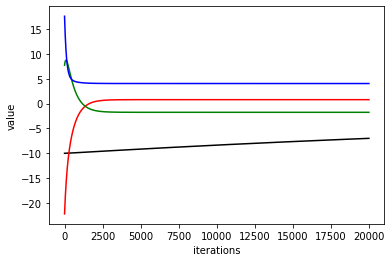

In [66]:
def main():
  theta_0,theta_1,theta_2,theta_3 = -10, -20, 10, 20  #Initialization
  train_costs = deque()
  test_costs = deque()
  theta_0s = deque()
  theta_1s = deque()
  theta_2s = deque()
  theta_3s = deque()
  iters = deque()

  for iter in range(0, 20000):
    train_value = objectiveFunction(train_data, theta_0, theta_1, theta_2, theta_3)
    theta_0, theta_1, theta_2, theta_3 = gradientDescent(train_data, theta_0, theta_1, theta_2, theta_3)
    test_value = objectiveFunction(test_data, theta_0, theta_1, theta_2, theta_3)

    #data 수집
    iters.append(iter)
    train_costs.append(train_value)
    test_costs.append(test_value)
    theta_0s.append(theta_0)
    theta_1s.append(theta_1)
    theta_2s.append(theta_2)
    theta_3s.append(theta_3)

  print("Plotting the Model Parameters")
  fig = plt.figure()
  graph1 = plt.plot(iters, theta_0s, 'k')
  graph2 = plt.plot(iters, theta_1s, 'r')
  graph3 = plt.plot(iters, theta_2s, 'g')
  graph4 = plt.plot(iters, theta_3s, 'b')
  plt.xlabel('iterations')
  plt.ylabel('value')
  plt.show()



if __name__ == "__main__":
  main()